In [59]:
# Import các thư viện cần thiết
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
saving_path = r"..\docs\Sentimen_Groups"
# Thiết lập kiểu hiển thị cho seaborn
sns.set(style="whitegrid")

In [60]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('../data/external/sentimentgroups.csv')

# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng đầu tiên của tập dữ liệu:")
display(df.head())

# Kiểm tra thông tin cơ bản của dữ liệu
print("\nThông tin dữ liệu:")
df.info()

# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

print("\n Các loại cảm xúc:")
print(df["Sentiment"].unique())

print("\n Độ dài dữ liệu")
print(len(df))

5 dòng đầu tiên của tập dữ liệu:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB

Số lượng giá trị thiếu trong mỗi cột:
Unnamed: 0.1    0
Unnamed: 0      0
Text  

In [61]:
# Loại bỏ cột không cần thiết
if 'Unnamed: 0.1' in df.columns:
    df.drop('Unnamed: 0.1', axis=1, inplace=True)

# Chuyển đổi cột Timestamp thành kiểu datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Dữ liệu sau khi làm sạch:")
display(df.head(20))

Dữ liệu sau khi làm sạch:


,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


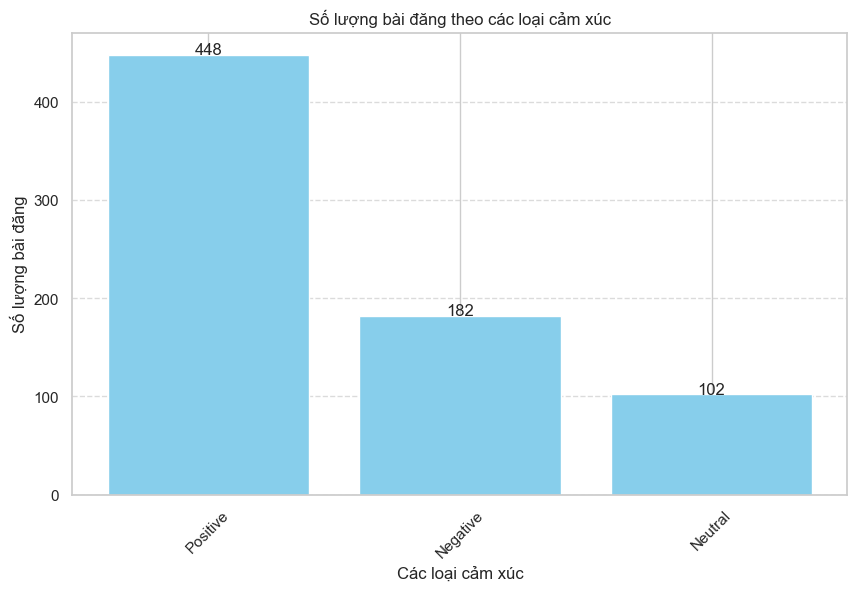

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng phân phối theo cảm xúc.png


In [62]:
# Làm sạch dữ liệu cột Sentiment
df['Sentiment'] = df['Sentiment'].str.strip()
# Sau đó thực hiện lọc với danh sách ban đầu
positive_sentiments = ['Positive','Negative','Neutral']
positive_df = df[df['Sentiment'].isin(positive_sentiments)]

# Đếm số lượng bài đăng cho từng loại cảm xúc tích cực
positive_counts = positive_df['Sentiment'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ
plt.bar(positive_counts.index, positive_counts.values, color='skyblue')  # Vẽ các cột với màu xanh nhạt

# Thêm nhãn và tiêu đề
plt.xlabel('Các loại cảm xúc')  # Nhãn trục x
plt.ylabel('Số lượng bài đăng')  # Nhãn trục y
plt.title('Số lượng bài đăng theo các loại cảm xúc')  # Tiêu đề biểu đồ

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)

# Thêm giá trị lên đầu mỗi cột
for i, value in enumerate(positive_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center')  # Hiển thị số lượng trên mỗi cột

# Thêm lưới cho trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng phân phối theo cảm xúc.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

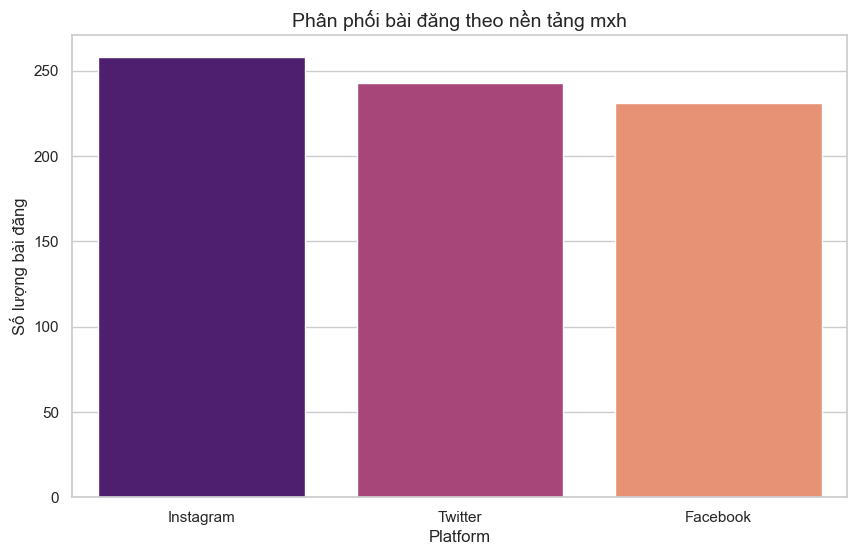

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng theo nền tảng mxh.png


In [128]:
# Đếm số lượng bài đăng theo Platform
df['Platform'] = df['Platform'].str.strip()
platform_counts = df['Platform'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="magma")
plt.title('Phân phối bài đăng theo nền tảng mxh', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng theo nền tảng mxh.png


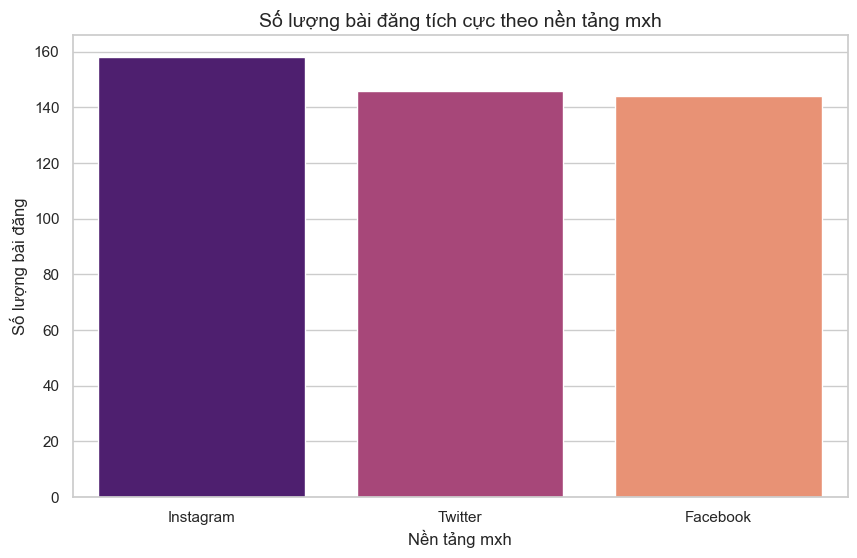

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng tích cực theo nền tảng mxh.png


In [129]:
print(f"Biểu đồ đã được lưu tại: {file_name}")
# Đếm số lượng bài đăng theo Platform
posts_per_platform = df[df["Sentiment"] == "Positive"]["Platform"].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_platform.index, y=posts_per_platform.values, palette="magma")
plt.title('Số lượng bài đăng tích cực theo nền tảng mxh', fontsize=14)
plt.xlabel('Nền tảng mxh', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tích cực theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

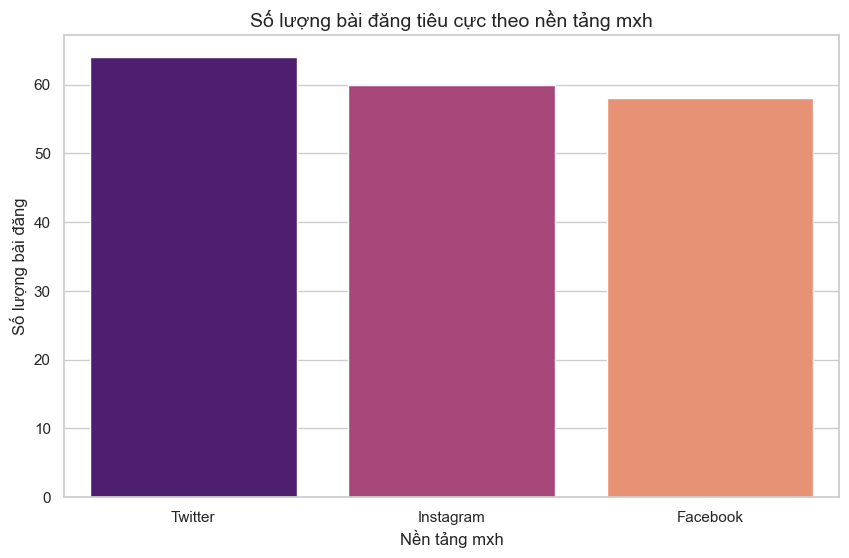

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng tiêu cực theo nền tảng mxh.png


In [126]:
# Đếm số lượng bài đăng theo Platform
posts_per_platform = df[df["Sentiment"] == "Negative"]["Platform"].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_platform.index, y=posts_per_platform.values,palette="magma")
plt.title('Số lượng bài đăng tiêu cực theo nền tảng mxh', fontsize=14)
plt.xlabel('Nền tảng mxh', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tiêu cực theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

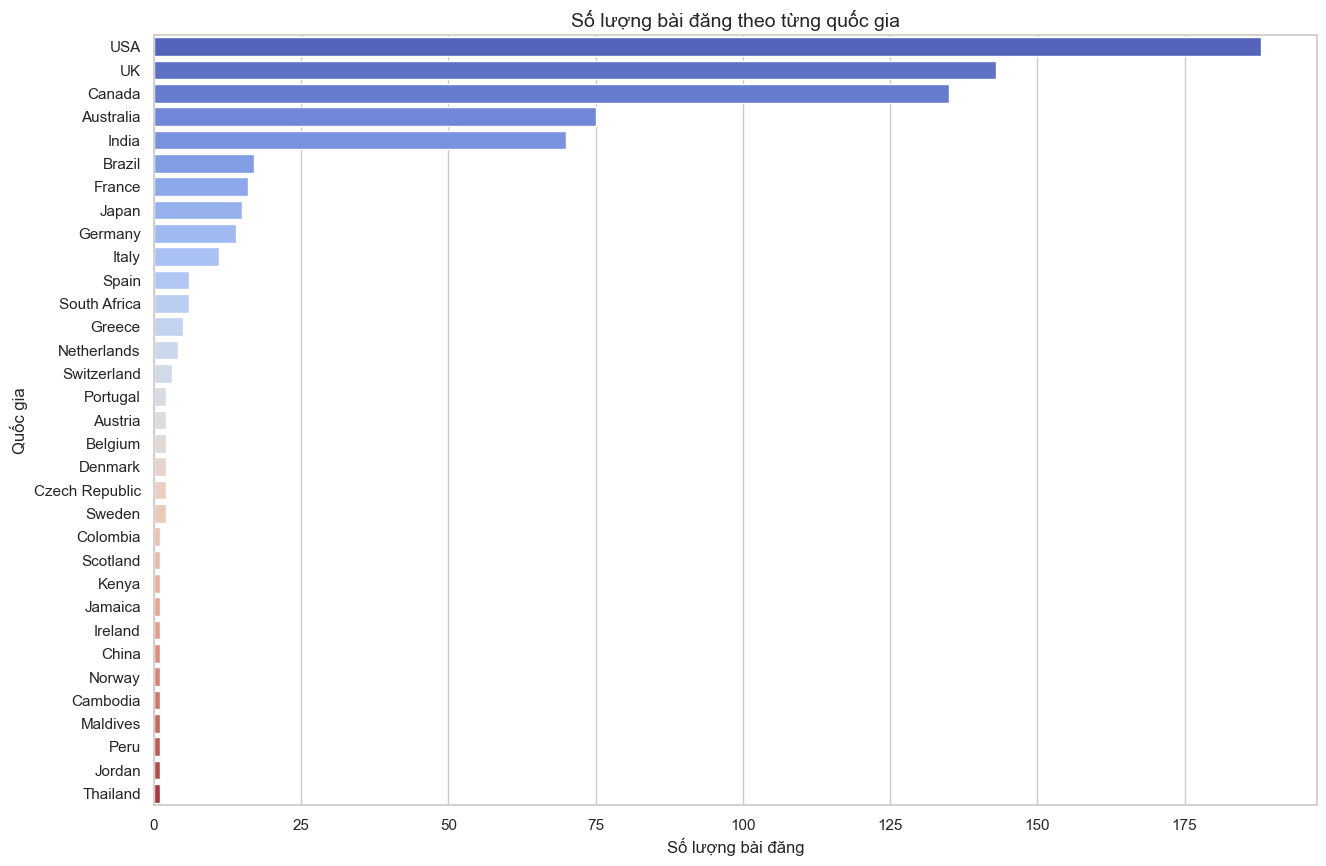

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng theo từng quốc gia.png


In [127]:
# Đếm số lượng bài đăng theo Country (lấy top 10)
df["Country"] = df["Country"].str.strip()
country_counts = df['Country'].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")
plt.title('Số lượng bài đăng theo từng quốc gia', fontsize=14)
plt.ylabel('Quốc gia', fontsize=12)
plt.xlabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo từng quốc gia.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

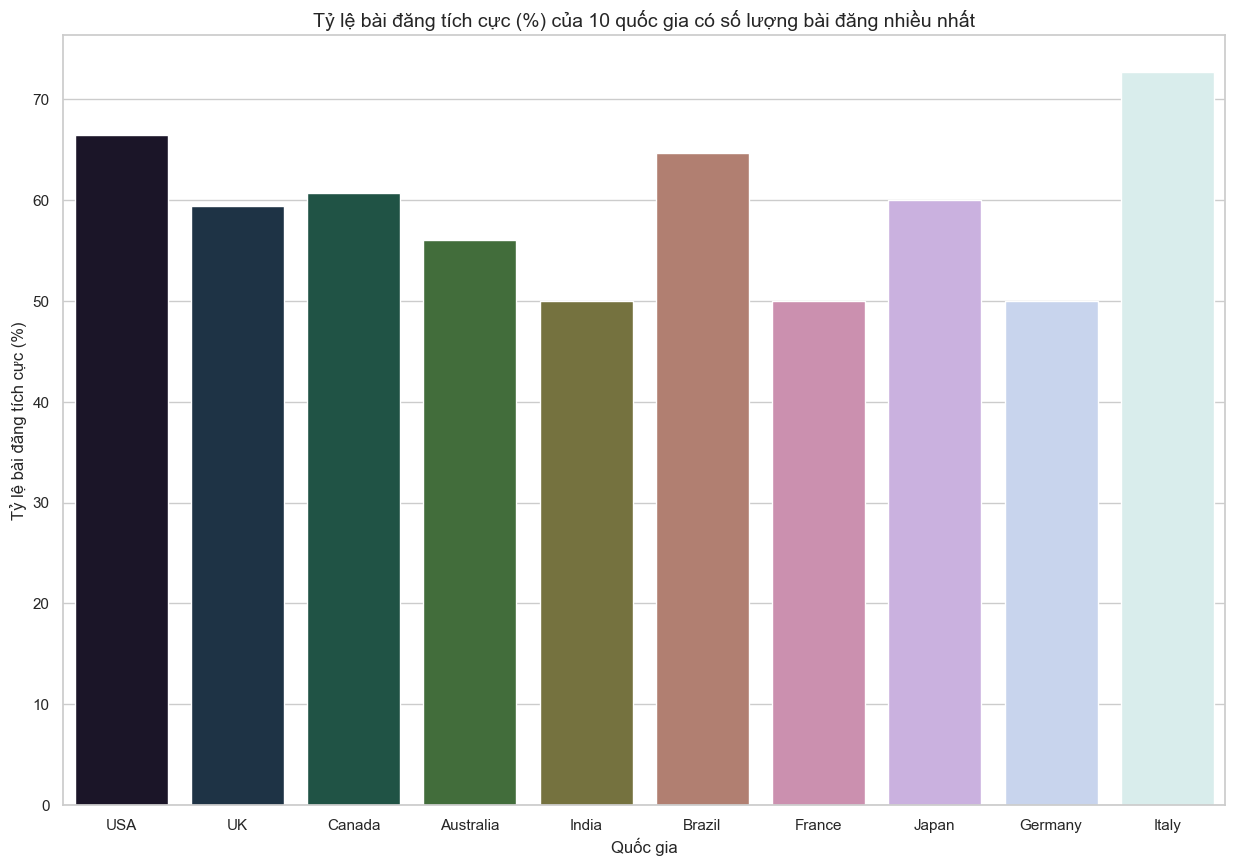

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\Tỷ lệ bài đăng tích cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png


In [112]:
# Chuẩn hóa dữ liệu
df["Country"] = df["Country"].str.strip()
df["Sentiment"] = df["Sentiment"].str.strip()

# Lấy top 10 quốc gia có số lượng bài đăng nhiều nhất
top_10_total_posts = df["Country"].value_counts().head(10)

# Đếm số bài đăng Positive tương ứng với các quốc gia này
positive_counts_in_top_10 = df[df["Sentiment"] == "Positive"]["Country"].value_counts().reindex(top_10_total_posts.index, fill_value=0)

# Tính tỷ lệ Positive / Tổng bài đăng (%)
positive_ratio_top_10 = (positive_counts_in_top_10 / top_10_total_posts * 100)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(x=positive_ratio_top_10.index, y=positive_ratio_top_10.values, palette="cubehelix")
plt.title('Tỷ lệ bài đăng tích cực (%) của 10 quốc gia có số lượng bài đăng nhiều nhất', fontsize=14)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tỷ lệ bài đăng tích cực (%)', fontsize=12)

# Đường dẫn lưu hình ảnh
file_name = os.path.join(saving_path, "Tỷ lệ bài đăng tích cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

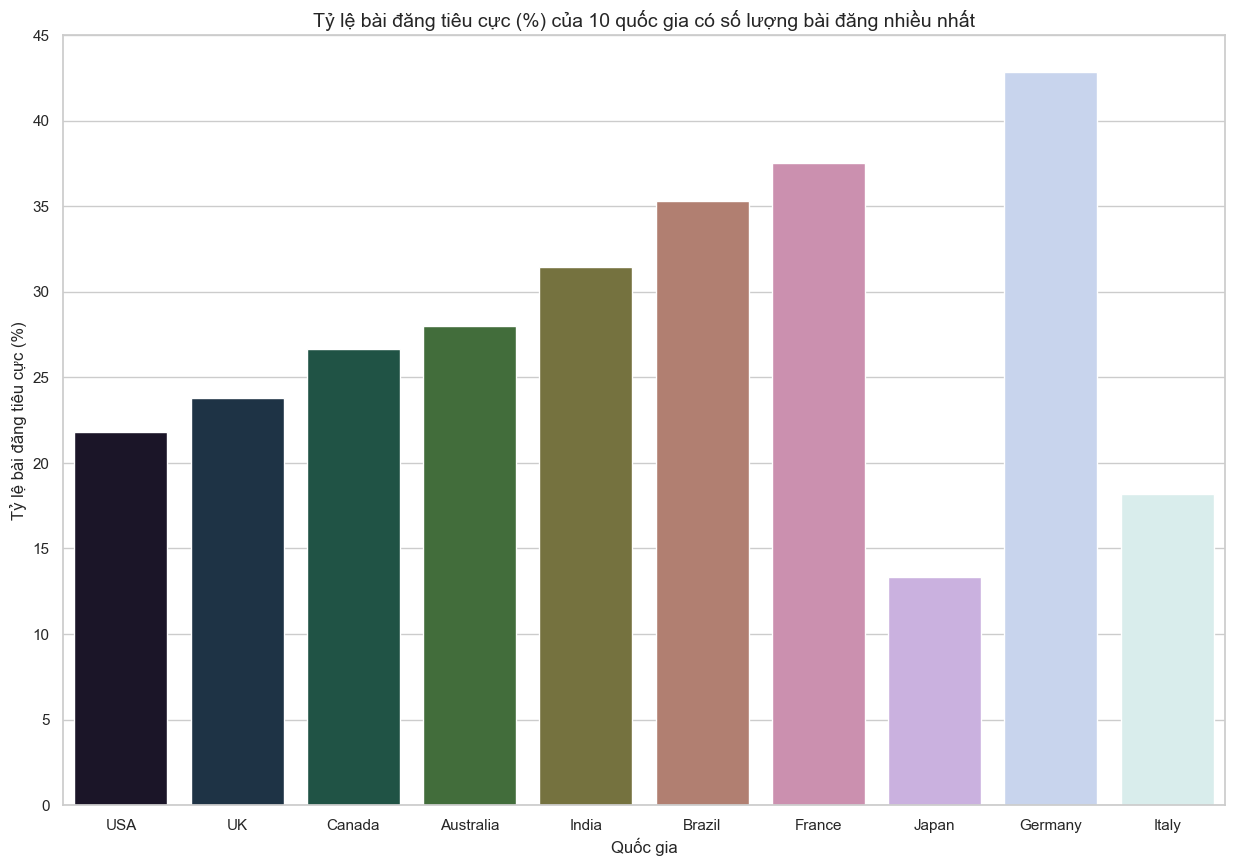

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\Tỷ lệ bài đăng tiêu cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png


In [113]:
# Chuẩn hóa dữ liệu
df["Country"] = df["Country"].str.strip()
df["Sentiment"] = df["Sentiment"].str.strip()

# Lấy top 10 quốc gia có số lượng bài đăng nhiều nhất
top_10_total_posts = df["Country"].value_counts().head(10)

# Đếm số bài đăng Positive tương ứng với các quốc gia này
positive_counts_in_top_10 = df[df["Sentiment"] == "Negative"]["Country"].value_counts().reindex(top_10_total_posts.index, fill_value=0)

# Tính tỷ lệ Positive / Tổng bài đăng (%)
positive_ratio_top_10 = (positive_counts_in_top_10 / top_10_total_posts * 100)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(x=positive_ratio_top_10.index, y=positive_ratio_top_10.values, palette="cubehelix")
plt.title('Tỷ lệ bài đăng tiêu cực (%) của 10 quốc gia có số lượng bài đăng nhiều nhất', fontsize=14)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tỷ lệ bài đăng tiêu cực (%)', fontsize=12)

# Đường dẫn lưu hình ảnh
file_name = os.path.join(saving_path, "Tỷ lệ bài đăng tiêu cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

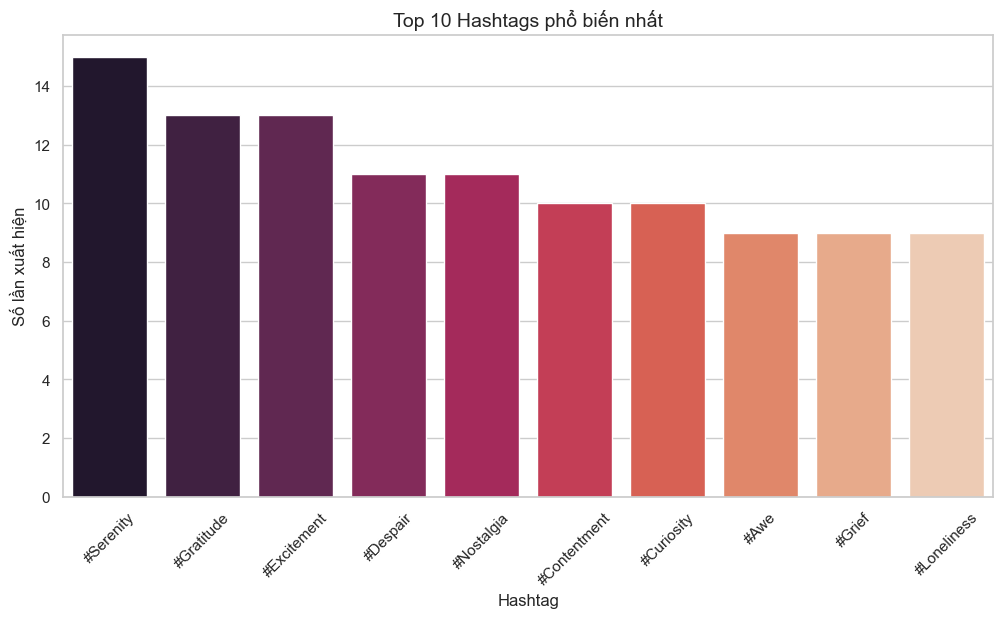

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\top 10 hashtags phổ biết nhất.png


In [65]:
# Tách và đếm các hashtag
all_hashtags = df['Hashtags'].str.split().sum()
hashtag_counts = Counter(all_hashtags)
most_common_hashtags = hashtag_counts.most_common(10)

# Chuẩn bị dữ liệu để vẽ biểu đồ
hashtags, counts = zip(*most_common_hashtags)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=list(hashtags), y=list(counts), palette="rocket")
plt.title('Top 10 Hashtags phổ biến nhất', fontsize=14)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Số lần xuất hiện', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 hashtags phổ biết nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

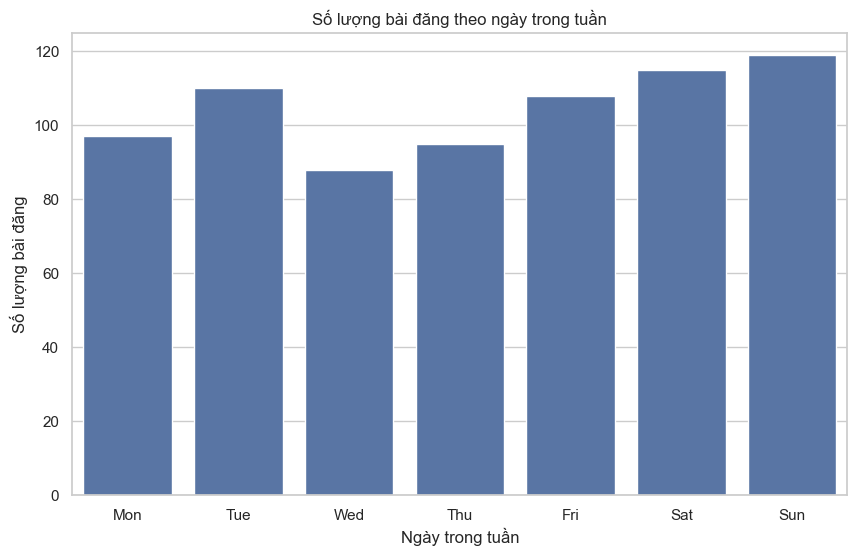

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng theo ngày trong tuần.png


In [68]:
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day = df['DayOfWeek'].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,6))
sns.barplot(x=days, y=posts_per_day.values)
plt.title('Số lượng bài đăng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng bài đăng')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

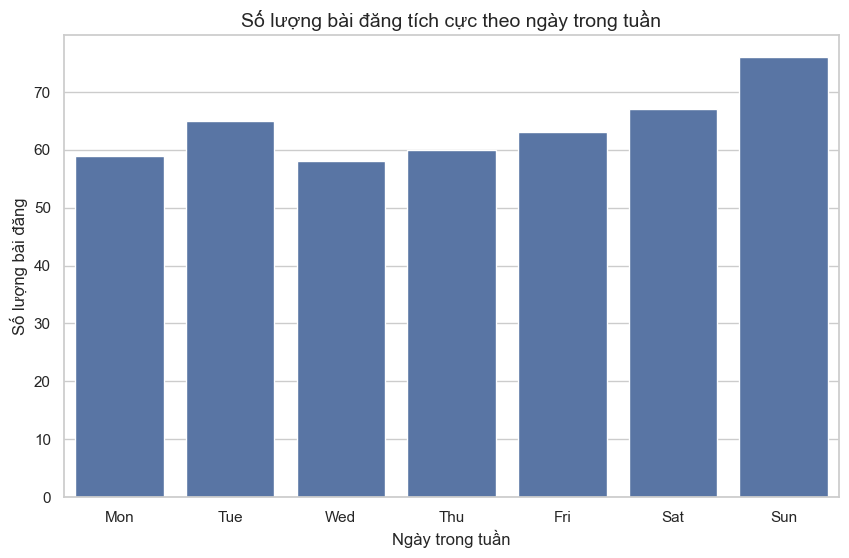

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng tích cực theo ngày trong tuần.png


In [117]:
# Đếm số lượng bài đăng theo Platform
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day = df[df["Sentiment"] == "Positive"]["DayOfWeek"].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=posts_per_day.values)
plt.title('Số lượng bài đăng tích cực theo ngày trong tuần', fontsize=14)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tích cực theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

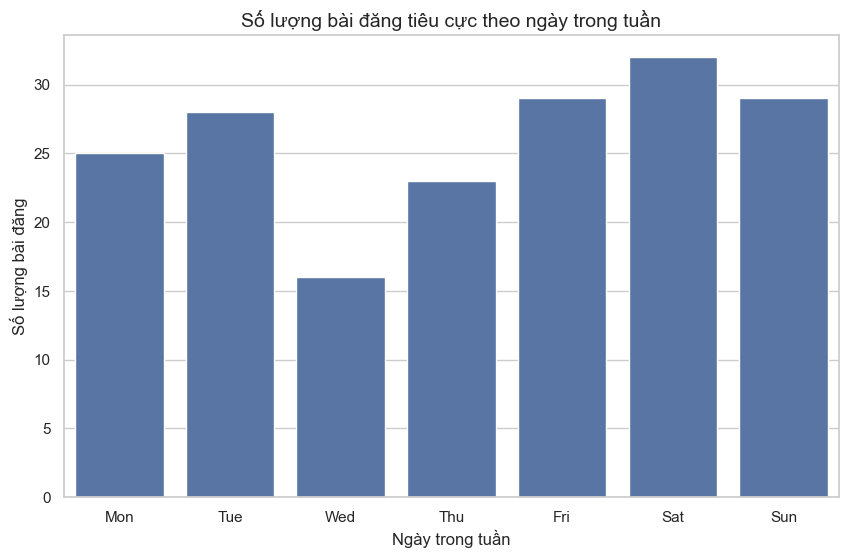

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng tiêu cực theo ngày trong tuần.png


In [118]:
# Đếm số lượng bài đăng theo Platform
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day = df[df["Sentiment"] == "Negative"]["DayOfWeek"].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=posts_per_day.values)
plt.title('Số lượng bài đăng tiêu cực theo ngày trong tuần', fontsize=14)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tiêu cực theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

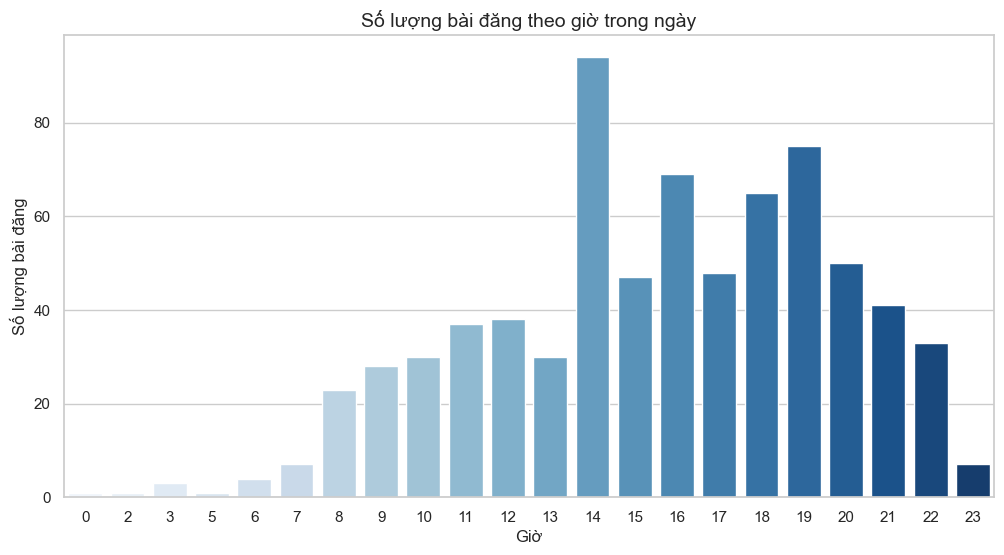

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\số lượng bài đăng theo giờ trong ngày.png


In [69]:
# Tạo cột Date từ Timestamp
df['Date'] = df['Timestamp'].dt.date

# Đếm số bài đăng theo ngày
posts_per_day = df.groupby('Date').size()
# Đếm số bài đăng theo giờ
df['Hour'] = df['Timestamp'].dt.hour
posts_per_hour = df.groupby('Hour').size()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, palette="Blues")
plt.title('Số lượng bài đăng theo giờ trong ngày', fontsize=14)
plt.xlabel('Giờ', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo giờ trong ngày.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

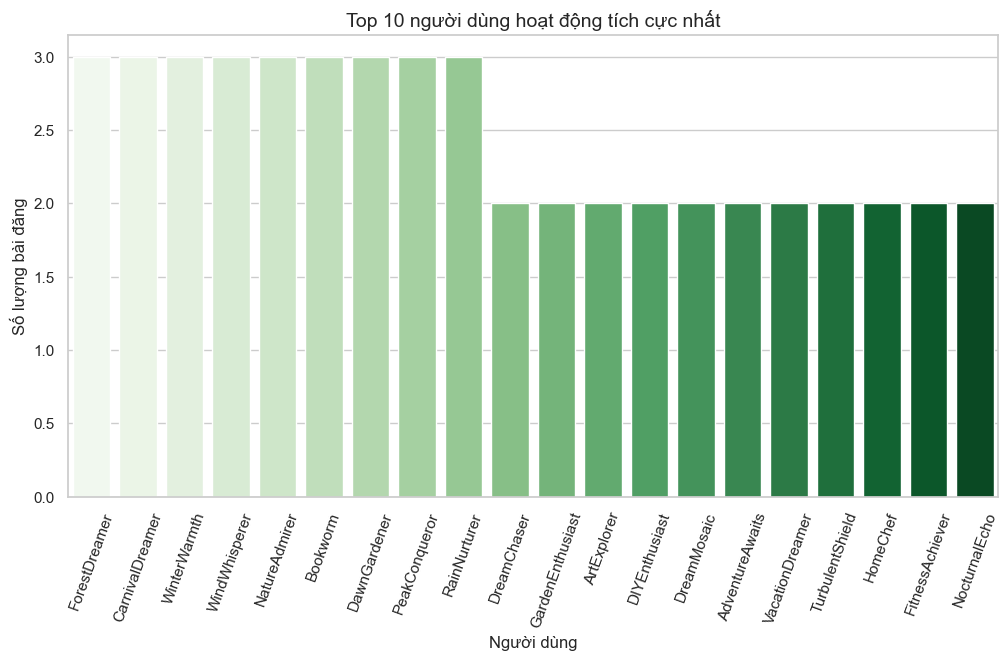

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\top 10 người dùng hoạt động tích cực nhất


In [95]:
# Đếm số bài đăng theo User
df['User']=df['User'].str.strip()
user_counts = df['User'].value_counts().head(20)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="Greens")
plt.title('Top 10 người dùng hoạt động tích cực nhất', fontsize=14)
plt.xlabel('Người dùng', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
plt.xticks(rotation=70)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 người dùng hoạt động tích cực nhất")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

In [99]:
# Sắp xếp theo Likes và lấy top 10
top_likes = df.sort_values(by='Likes', ascending=False).head(10)
print("Top 10 bài đăng có nhiều lượt thích nhất:")
display(top_likes[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

bottom_likes = df.sort_values(by='Likes', ascending=True).head(10)
print("Top 10 bài đăng có ít lượt thích nhất:")
display(bottom_likes[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

# Sắp xếp theo Retweets và lấy top 10
top_retweets = df.sort_values(by='Retweets', ascending=False).head(10)
print("Top 10 bài đăng có nhiều lượt đăng lại nhất:")
display(top_retweets[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

bottom_retweets = df.sort_values(by='Retweets', ascending=True).head(10)
print("Top 10 bài đăng có ít lượt đăng lại nhất:")
display(bottom_retweets[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

Top 10 bài đăng có nhiều lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
481,"Surrounded by the colors of joy, a canvas pain...",80.0,40.0,Positive,Instagram
530,"Captivated by the spellbinding plot twists, th...",80.0,40.0,Positive,Twitter
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Positive,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Positive,Instagram
470,"Dancing on sunshine, each step a celebration o...",80.0,40.0,Positive,Instagram
550,"After a series of defeats, the soccer team fac...",80.0,40.0,Negative,Twitter
368,Elation over discovering a rare book in a quai...,80.0,40.0,Positive,Instagram
540,Celebrating a historic victory in the World Cu...,80.0,40.0,Positive,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,40.0,Positive,Twitter
570,"Underneath the city lights, the dancer express...",80.0,40.0,Positive,Twitter


Top 10 bài đăng có ít lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
1,Traffic was terrible this morning. ...,10.0,5.0,Negative,Twitter
163,Suffering from despair after another setback....,10.0,5.0,Negative,Twitter
199,"A numbness settles over me, a shield against ...",15.0,8.0,Neutral,Twitter
195,"Boredom lingers, a stagnant pool of indiffere...",15.0,7.0,Negative,Facebook
19,Winter blues got me feeling low. ...,15.0,8.0,Negative,Instagram
197,"Lost in the vast sea of information, an indif...",15.0,7.0,Neutral,Instagram
164,"Overwhelmed by grief, missing a loved one dea...",15.0,8.0,Negative,Instagram
188,Disgust at the corruption that stains society...,15.0,7.0,Negative,Instagram
209,"Numb to the chaos, emotions locked away, a st...",15.0,8.0,Neutral,Instagram
167,Resentment building up over past betrayals. ...,15.0,7.0,Negative,Instagram


Top 10 bài đăng có nhiều lượt đăng lại nhất:


,Text,Likes,Retweets,Sentiment,Platform
570,"Underneath the city lights, the dancer express...",80.0,40.0,Positive,Twitter
470,"Dancing on sunshine, each step a celebration o...",80.0,40.0,Positive,Instagram
368,Elation over discovering a rare book in a quai...,80.0,40.0,Positive,Instagram
540,Celebrating a historic victory in the World Cu...,80.0,40.0,Positive,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Positive,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,40.0,Positive,Twitter
402,Awe-inspired by the vastness of the cosmos on ...,80.0,40.0,Positive,Instagram
530,"Captivated by the spellbinding plot twists, th...",80.0,40.0,Positive,Twitter
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Positive,Instagram
432,"Heartache deepens, a solitary journey through ...",80.0,40.0,Negative,Instagram


Top 10 bài đăng có ít lượt đăng lại nhất:


,Text,Likes,Retweets,Sentiment,Platform
1,Traffic was terrible this morning. ...,10.0,5.0,Negative,Twitter
163,Suffering from despair after another setback....,10.0,5.0,Negative,Twitter
188,Disgust at the corruption that stains society...,15.0,7.0,Negative,Instagram
182,"Boredom settles like dust, life feels mundane...",15.0,7.0,Negative,Instagram
195,"Boredom lingers, a stagnant pool of indiffere...",15.0,7.0,Negative,Facebook
197,"Lost in the vast sea of information, an indif...",15.0,7.0,Neutral,Instagram
167,Resentment building up over past betrayals. ...,15.0,7.0,Negative,Instagram
11,Feeling a bit under the weather today. ...,15.0,7.0,Negative,Twitter
175,Disgust at the sight of injustice and cruelty...,15.0,7.0,Negative,Twitter
185,"Helplessness engulfs me, drowning in a sea of...",15.0,8.0,Negative,Instagram


Thống kê cơ bản cho Retweets và Likes:


,Retweets,Likes
count,732.000000,732.000000
mean,21.508197,42.901639
std,7.061286,14.089848
min,5.000000,10.000000
25%,17.750000,34.750000
50%,22.000000,43.000000
75%,25.000000,50.000000
max,40.000000,80.000000


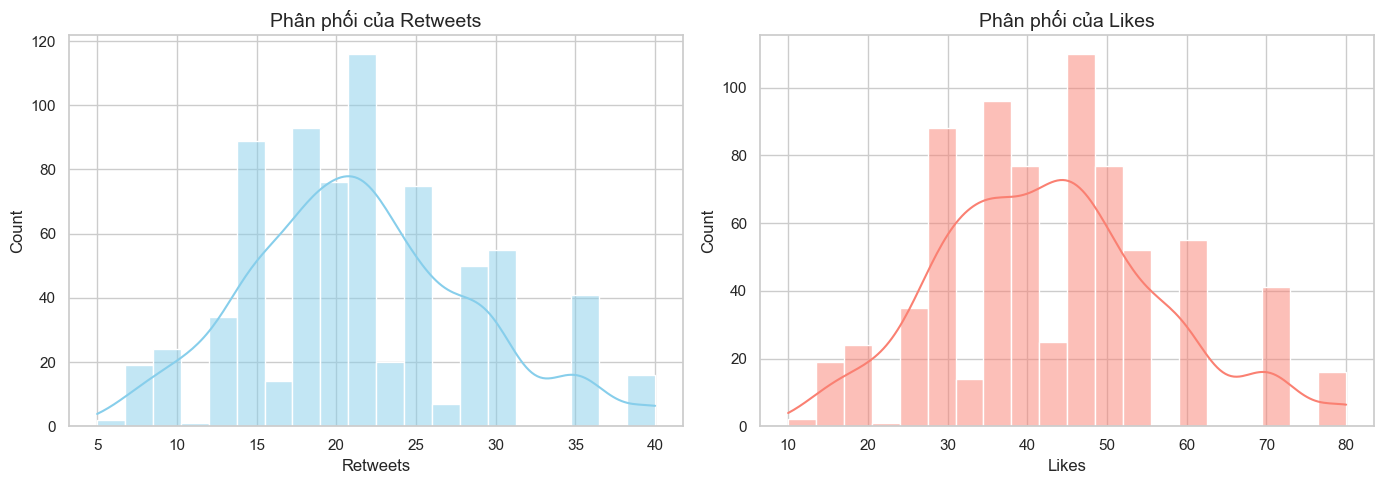

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\phân phối lượt chia sẻ và lượt thích.png


In [66]:
# Thống kê cơ bản
print("Thống kê cơ bản cho Retweets và Likes:")
display(df[['Retweets', 'Likes']].describe())

# Vẽ histogram
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Retweets'], bins=20, kde=True, color='skyblue')
plt.title('Phân phối của Retweets', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(df['Likes'], bins=20, kde=True, color='salmon')
plt.title('Phân phối của Likes', fontsize=14)

plt.tight_layout()
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "phân phối lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

Số lượng dòng dữ liệu: 732
         Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000


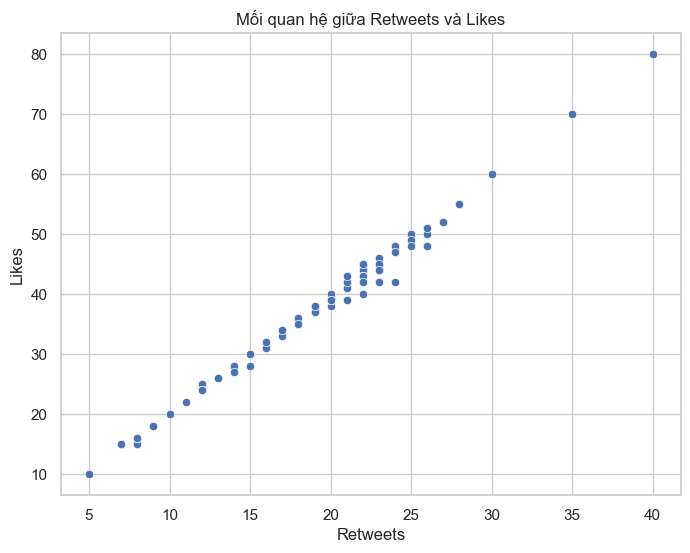

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\mối quan hệ giờ lượt chia sẻ và lượt thích.png
Hệ số tương quan Pearson: 0.9985
Giá trị p: 0.0000


In [67]:
# Kiểm tra số lượng dữ liệu
print(f"Số lượng dòng dữ liệu: {len(df)}")

# Kiểm tra phân phối của Retweets và Likes
print(df[['Retweets', 'Likes']].describe())

# Vẽ scatter plot để xem mối quan hệ
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.title('Mối quan hệ giữa Retweets và Likes')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "mối quan hệ giờ lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

# Kiểm tra tương quan Pearson chi tiết
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['Retweets'], df['Likes'])
print(f"Hệ số tương quan Pearson: {correlation:.4f}")
print(f"Giá trị p: {p_value:.4f}")

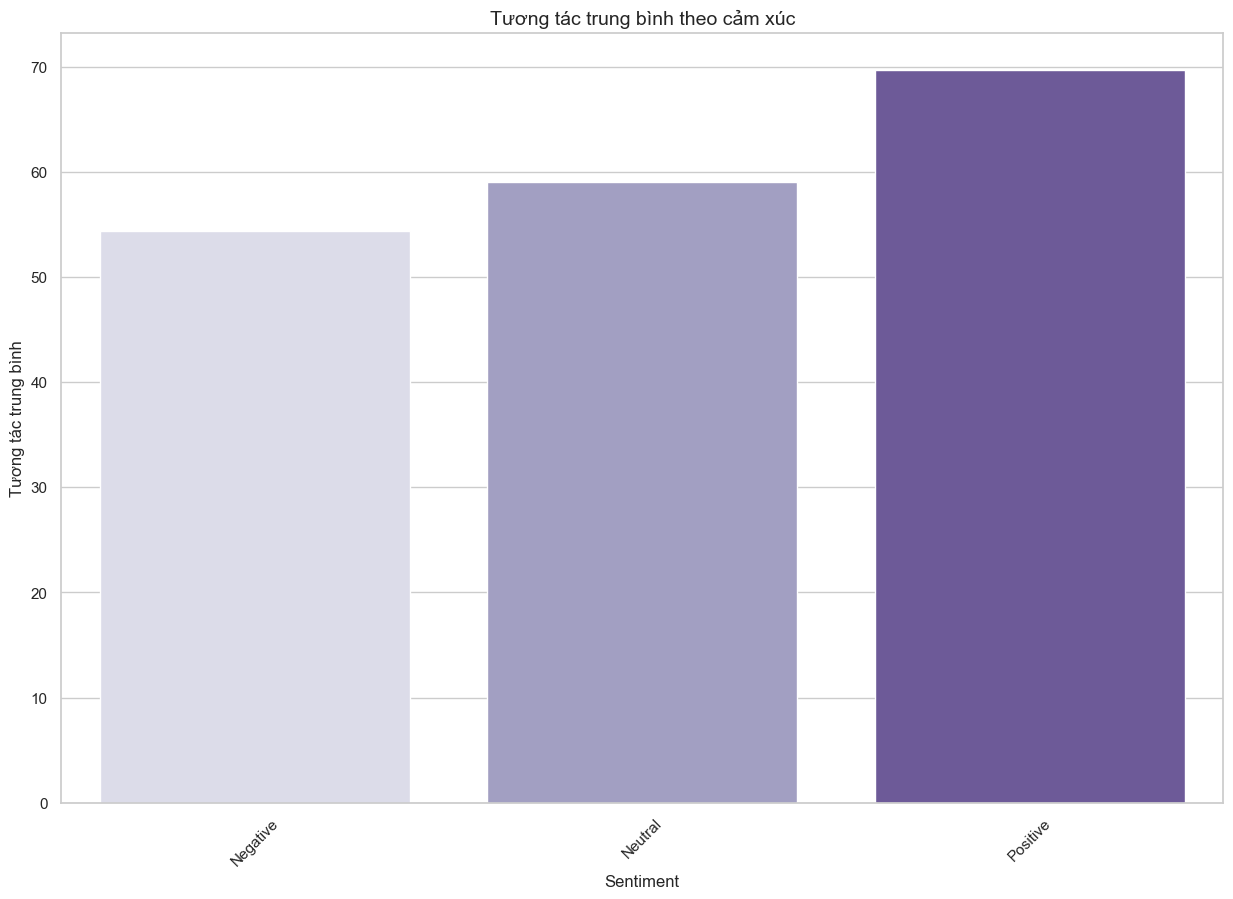

Biểu đồ đã được lưu tại: ..\docs\Sentimen_Groups\tương tác trung bình dựa theo cảm xúc.png


In [72]:
# Tạo cột Engagement
df['Engagement'] = df['Retweets'] + df['Likes']

# Engagement trung bình theo Sentiment
engagement_by_sentiment = df.groupby('Sentiment')['Engagement'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(x=engagement_by_sentiment.index, y=engagement_by_sentiment.values, palette="Purples")
plt.title('Tương tác trung bình theo cảm xúc', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tương tác trung bình', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "tương tác trung bình dựa theo cảm xúc.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")